## Data Science & Engineering Club — Week 4
    
#### Welcome back! Let's do some data cleaning and feature engineering.
    
   Data Cleaning + Feature Engineering for Machine Learning (California Housing Dataset),
    
   **Why did we choose this data set?**
    
Well, a commonly used data set for data cleaning + visualization is the Boston Housing data set, which you may or may not use for an in class lecture/homework assignment. This data set can give you a sense for how to think about Real Estate housing problems, how to manipulate the data sets to squeeze information out of them, and how to represent your findings beautifully. Let's get into it.

Feature Engineering
![Pic](https://miro.medium.com/max/1200/1*K6ctE0RZme0cqMtknrxq8A.png)

## Importing our Libraries
![Pic](https://miro.medium.com/max/1020/1*Hd5GAkOZSz7-4W8fnoV2NA.jpeg)

Credit to Alexander Hagmann for some materials used here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import numpy as np
import seaborn as sns
from IPython import display
import urllib.request
from PIL import Image

In [2]:
df = pd.read_csv("housing.csv")

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [3]:
# let's see what our data looks like
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
# how many rows and columns of data do we have?
print("We have {} rows in our data set, and {} columns in our data set.".format(df.shape[0], df.shape[1]))

We have 20640 rows in our data set, and 10 columns in our data set.


In [5]:
# let's check out some information in our data set
df.info()

# looks like some data is missing in only one column, otherwise we should be fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# let's check out basic summary statistics on our data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# We had an object data type in our data
# Let's check it out
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [8]:
df.ocean_proximity.value_counts()
# gives us an assessment of houses and their category w.r.t the body of water

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# This can also be done on numerical columns too!
df.total_bedrooms.value_counts()

# doesn't seem too helpful

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

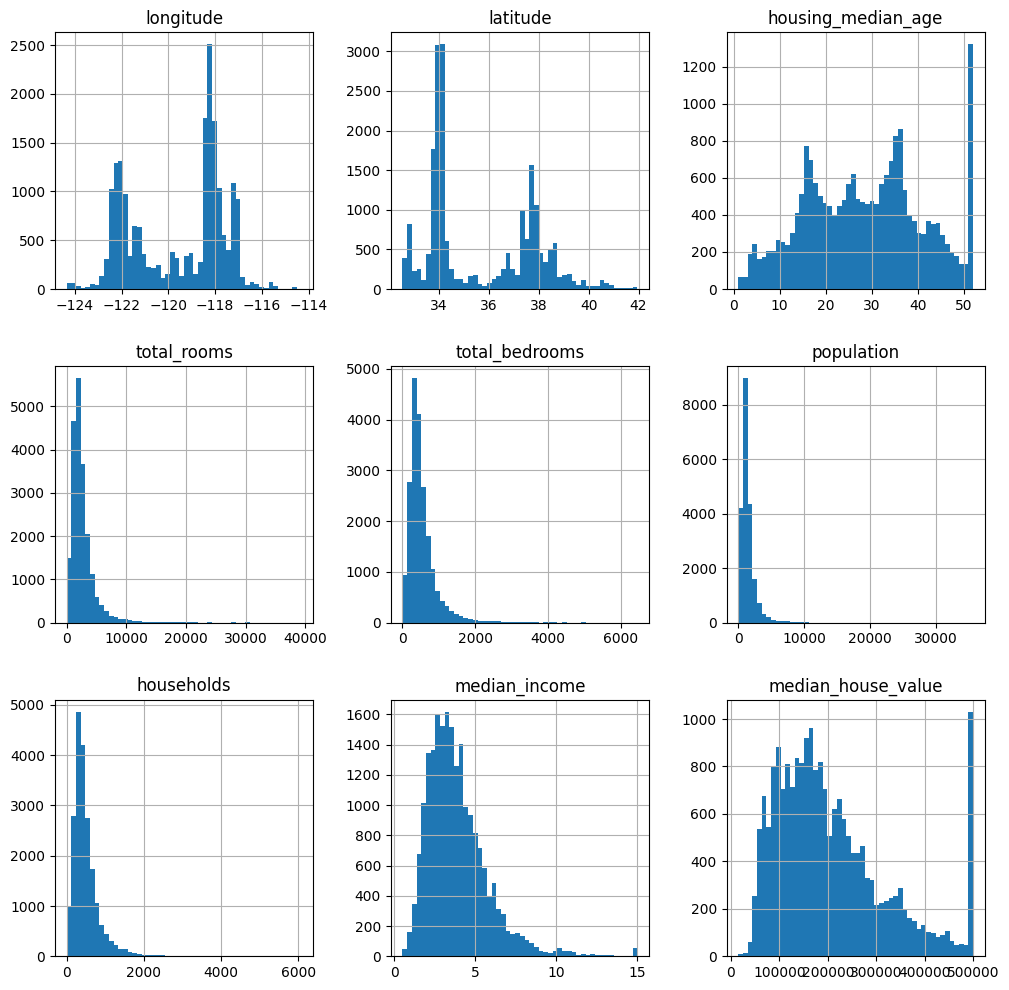

In [10]:
# Let's make a histogram for the numerical features now
df.hist(bins = 50, figsize = (12, 12))
plt.show()

### Data Cleaning and Feature Engineering 

Let's make some more Features to work with and clean our data.

**What does it mean to clean our data?**

- Getting rid of NA and NaN values
- Maybe performing data imputation — replacing missing data with substituted values
- Generally fixing/removing incorrect, incorrectly formatted, duplicated, corrupted, or even incomplete data that is present in a dataset

In [11]:
df.dropna(inplace = True)
# simply removing all NA values

In [12]:
# Let's create a new feature
# Let's say we want the dataset to get a new column named rooms_per_household
# How do we create that?
# Divide total rooms by # of households
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [13]:
df["rooms_per_household"]

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20433, dtype: float64

In [14]:
df.rooms_per_household.nsmallest(10)
# we should probably remove the first two data points
# what does it mean to have less than one room in a household?
# these are extreme values

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [15]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [16]:
# let's look into them
df.loc[[8219, 5916, 1979]]

# this doesn't really make sense

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333


In [17]:
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)

In [18]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892


In [19]:
df["pop_per_household"] = df.population.div(df.households)

### What are the things that may change the price of a house?

![Pic](https://www.mashvisor.com/blog/wp-content/uploads/2019/07/10-Factors-That-Affect-Property-Value-7-Will-Surprise-You.jpg)

In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


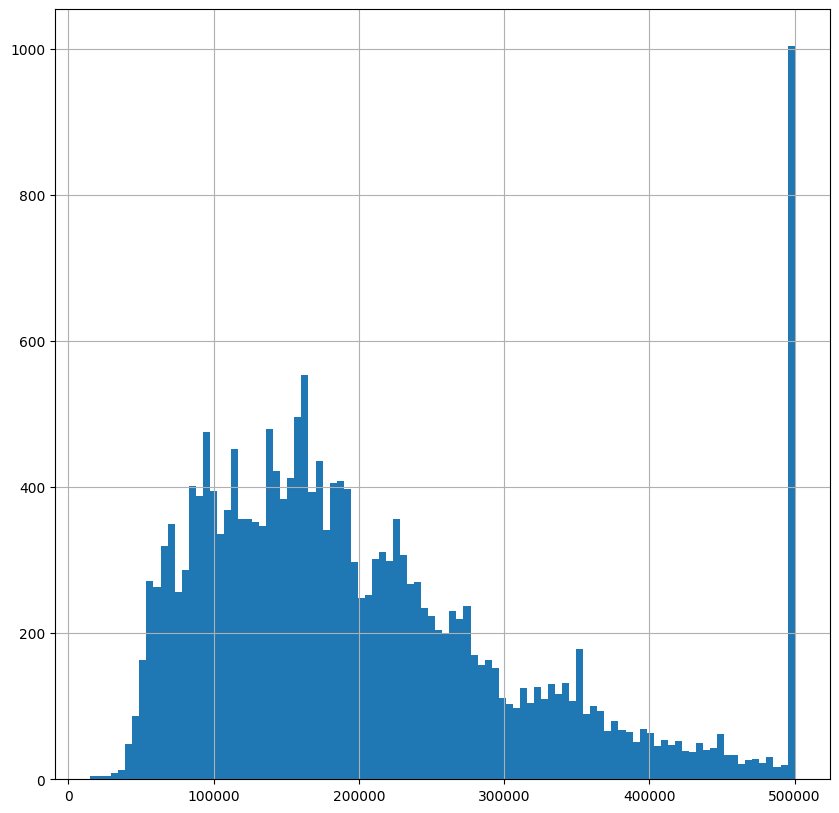

In [21]:
df.median_house_value.hist(bins=100, figsize = (10, 10))
plt.show()

In [22]:
# Let's check for any linear relationships between house prices features
# We're mostly interested in correlations between house values and features, do rooms jack up prices?
df.corr().median_house_value.sort_values(ascending = False) # sorted from high to low

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

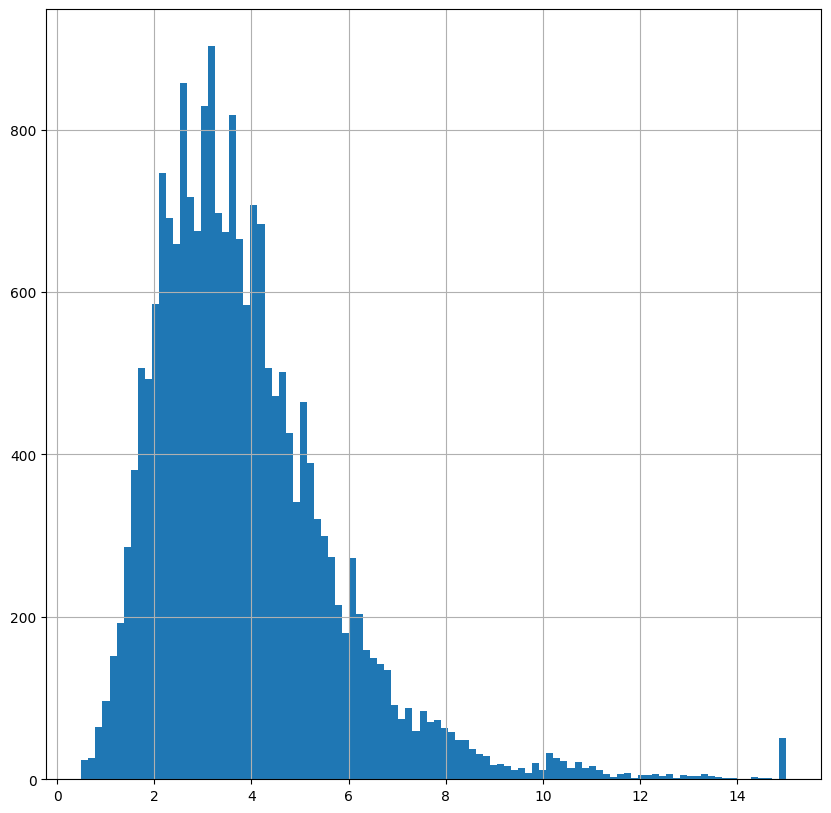

In [23]:
# Let's take a look at the distribution of the median income
# Right skewed
df.median_income.hist(bins = 100, figsize = (10, 10))
plt.show()

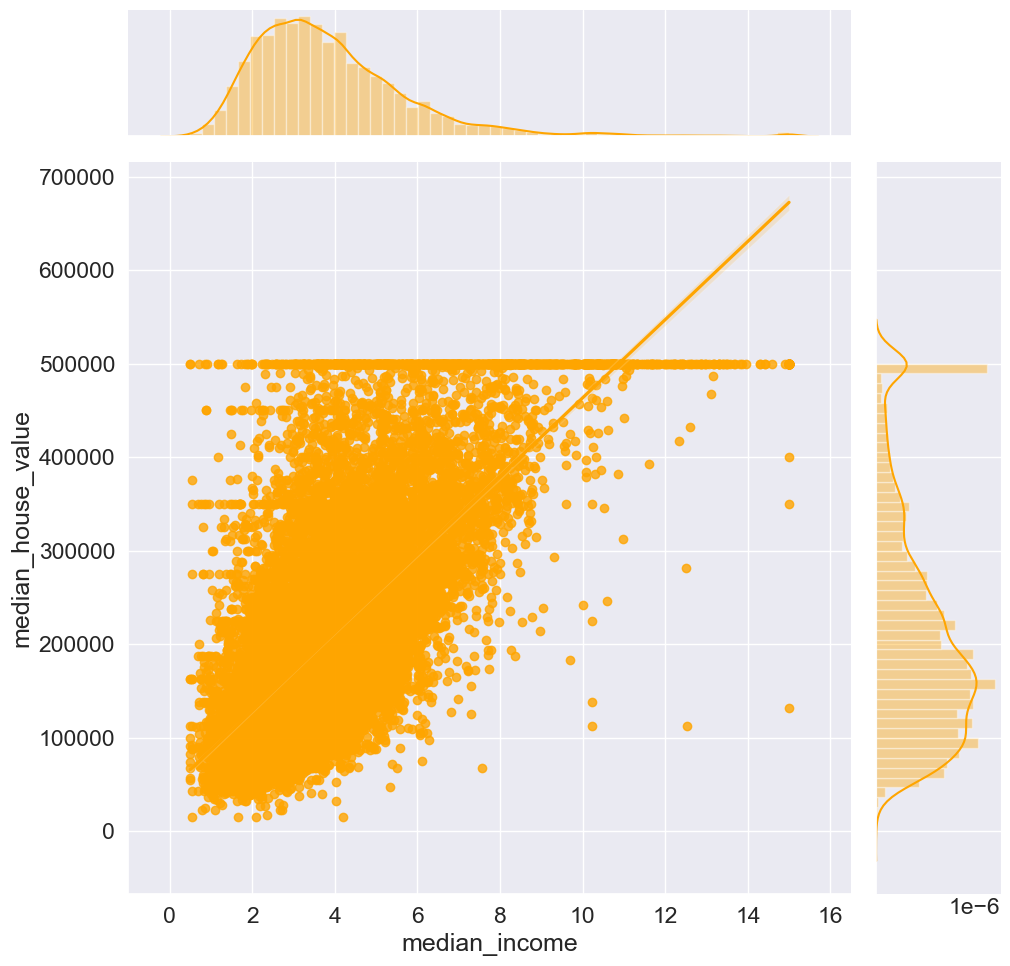

In [24]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", color = "orange", height = 10)
plt.show()
# the maximum value for the median_house_value is 500,000
# the relationship looks linear 

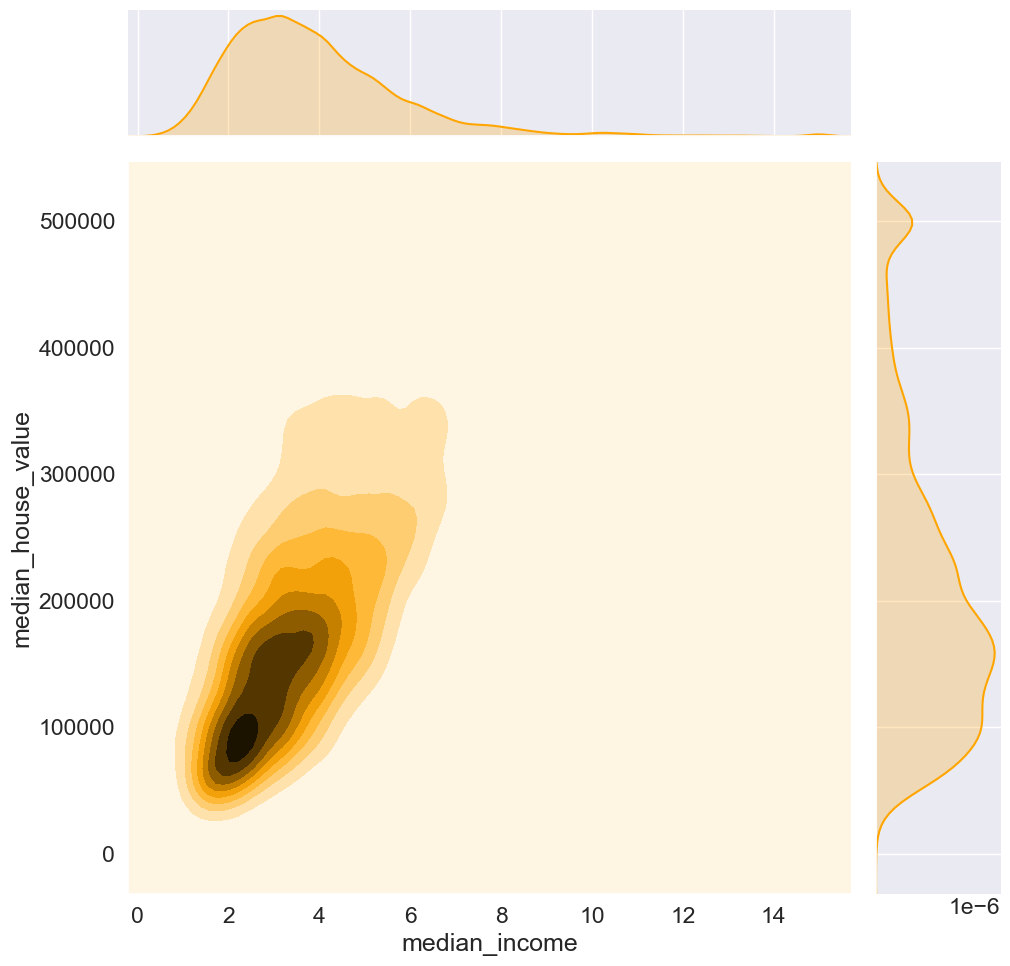

In [25]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", color = "orange", height = 10)
plt.show()

This tells us the most frequent income is between values 2 - 4, and house values of roughly $80,000 to $180,000. We also see a positive linear relationship.

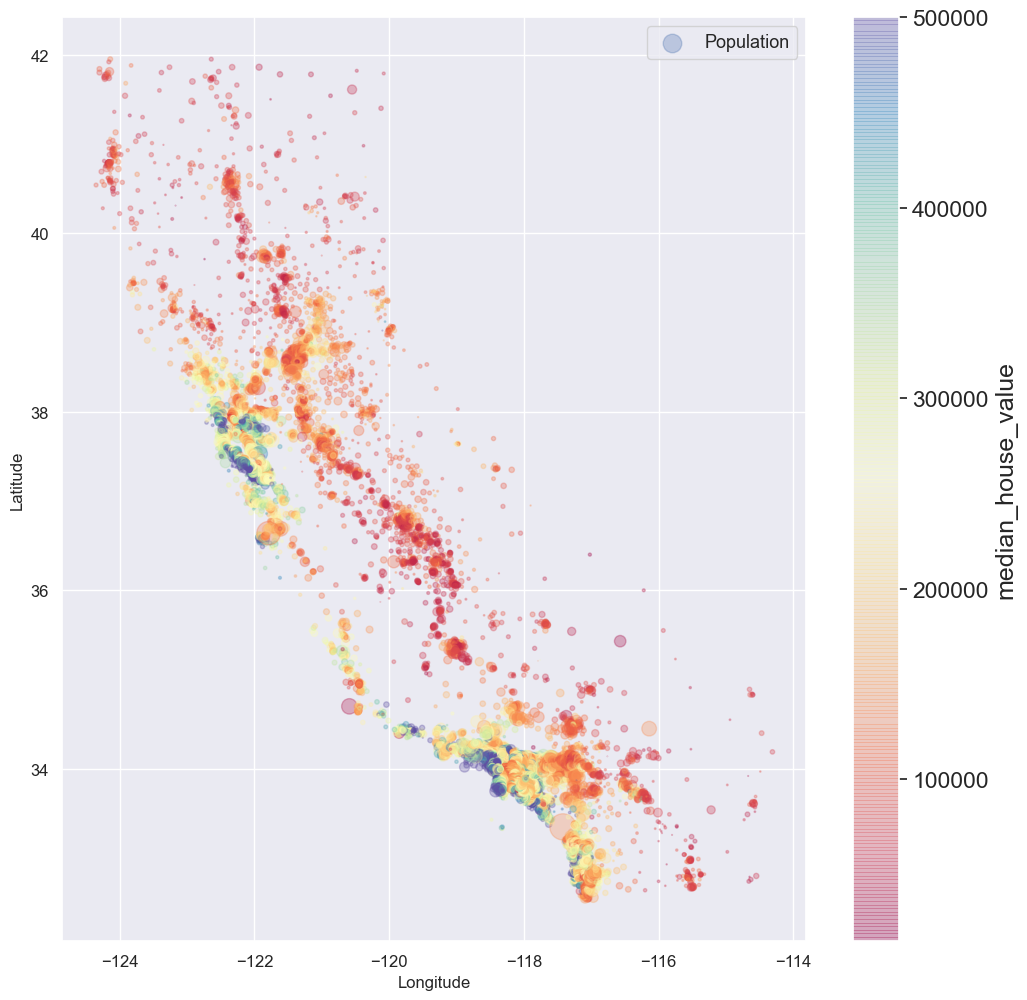

In [26]:
# let's take a further step into analyzing
# larger the population in the district, there will be a correspondingly high bubble for the data point
# figsize just determines size of the graphic
# cmap — color used to demonstrate the range of values
df.plot(kind = "scatter", x = "longitude", y = "latitude",
        s = df.population / 100, label = "Population", figsize = (12, 12),
        c = "median_house_value", cmap = "Spectral",
       colorbar = True, alpha = 0.3, fontsize = 12, sharex = False)
plt.ylabel("Latitude", fontsize = 12)
plt.xlabel("Longitude", fontsize = 12)
plt.legend(fontsize = 13)
plt.show()

In [27]:
cali_img = plt.imread("cali.png")

[Learn about relationship between pixels and images](https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/)

![FishUrl](https://www.whydomath.org/node/wavlets/images/Smalltoplevelraw.gif "fish")

![FishUrl](https://www.whydomath.org/node/wavlets/images/Smallimagebasicsred.gif "fish")

![FishUrl](https://www.whydomath.org/node/wavlets/images/Smallimagebasicsgreen.gif "fish")

![FishUrl](https://www.whydomath.org/node/wavlets/images/Smallimagebasicsblue.gif "fish")

![FishUrl](https://www.whydomath.org/node/wavlets/images/SmallimagebasicsY.gif "fish")

![FishUrl](https://www.whydomath.org/node/wavlets/images/SmallimagebasicsCb.gif "fish")

![FishUrl](https://www.whydomath.org/node/wavlets/images/SmallimagebasicsCr.gif "fish")

In [28]:
# all pictures can actually be represented as pixel values
cali_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

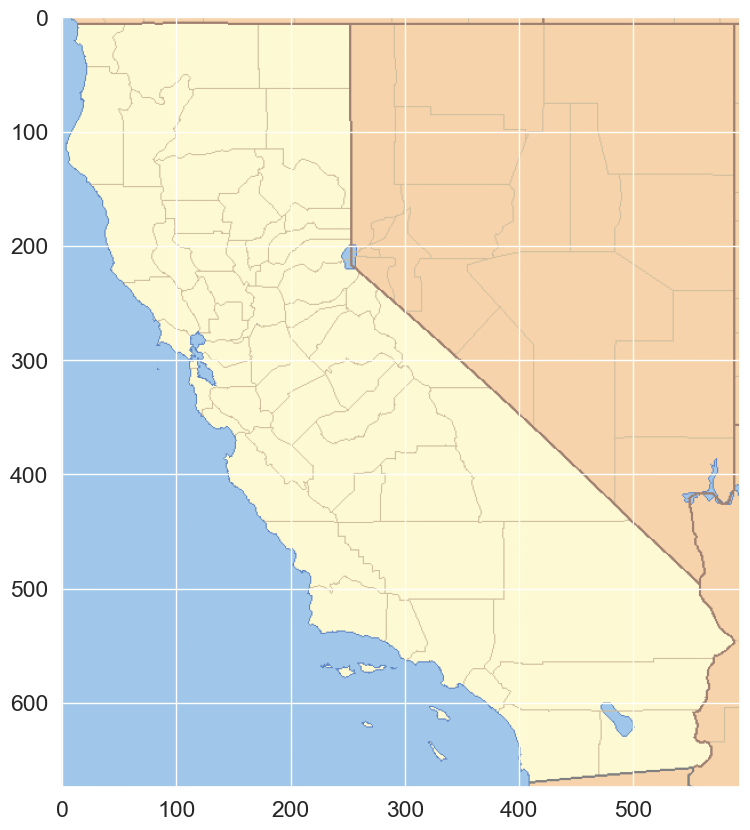

In [29]:
plt.figure(figsize = (10, 10))
plt.imshow(cali_img)
plt.show()

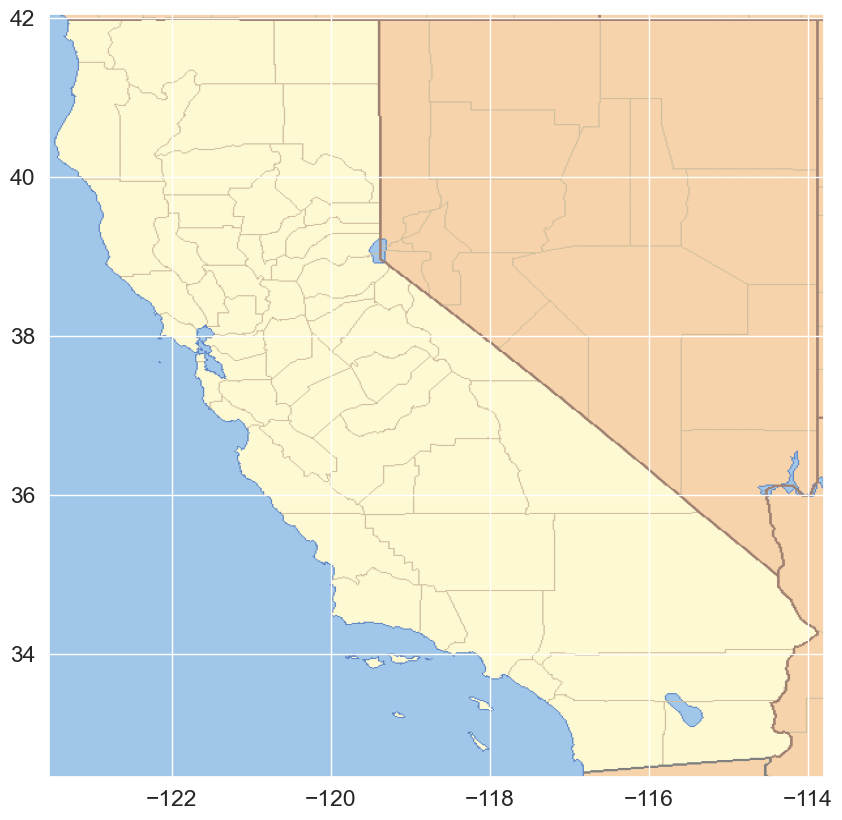

In [30]:
# Changing the x and y axes to coordinates
# There are other ways to change axes

plt.figure(figsize = (10, 10))
plt.imshow(cali_img, extent = [-123.55, -113.80, 32.45, 42.05])
plt.show()

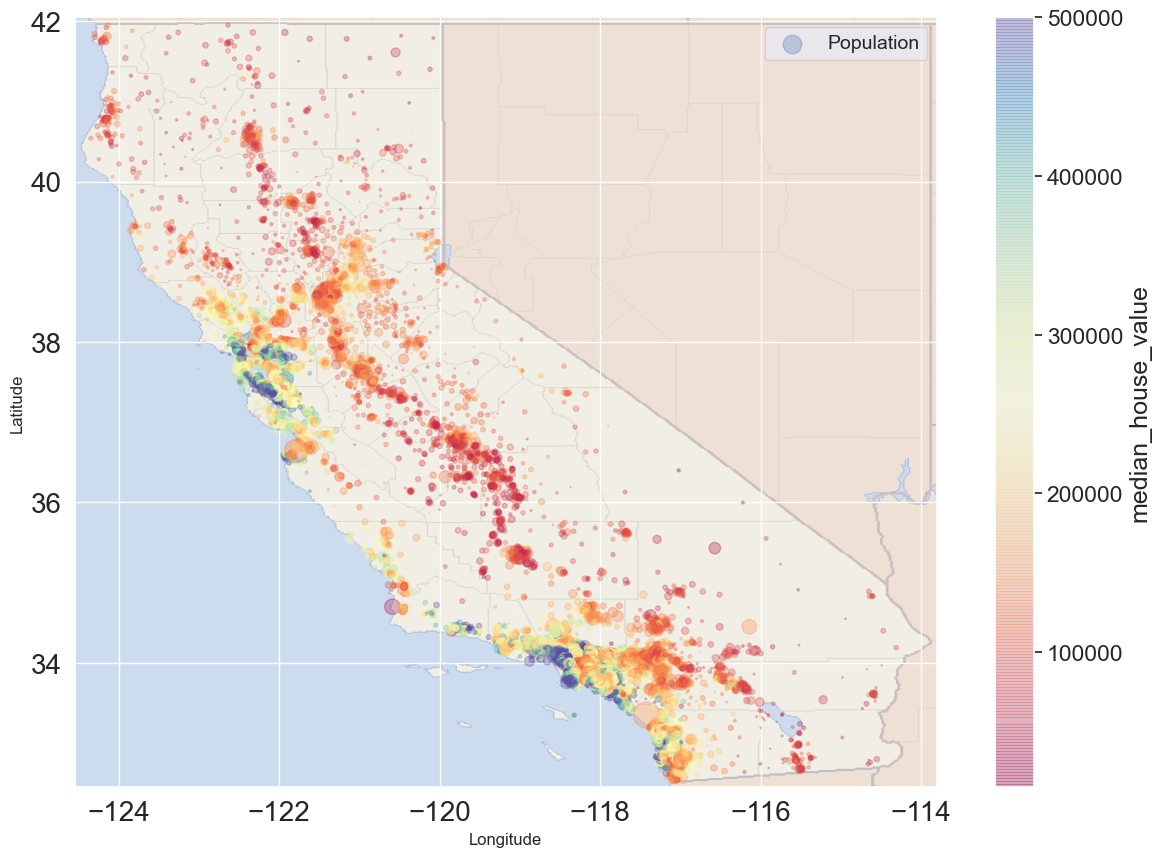

In [31]:
df.plot(kind = "scatter", x = "longitude", y = "latitude",
       s = df.population / 100, label = "Population", figsize = (15, 10),
       c = "median_house_value", cmap = "Spectral",
       colorbar = True, alpha = 0.3, fontsize = 20, sharex = False)

plt.imshow(cali_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.4,
           cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 12)
plt.xlabel("Longitude", fontsize = 12)
plt.legend(fontsize = 14)
plt.show()

# Coastal regions have more expensive houses
# inland houses have cheaper houses, which makes sense
# Waterfront properties tend to gain more buyers, despite environmetnal concerns

In [32]:
prox = df.ocean_proximity.unique()
prox
# rechecking our unique values here

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
# We want to specify houses near the ocean location to pop up on our map
df_loc = df[df.ocean_proximity == prox[3]].copy()

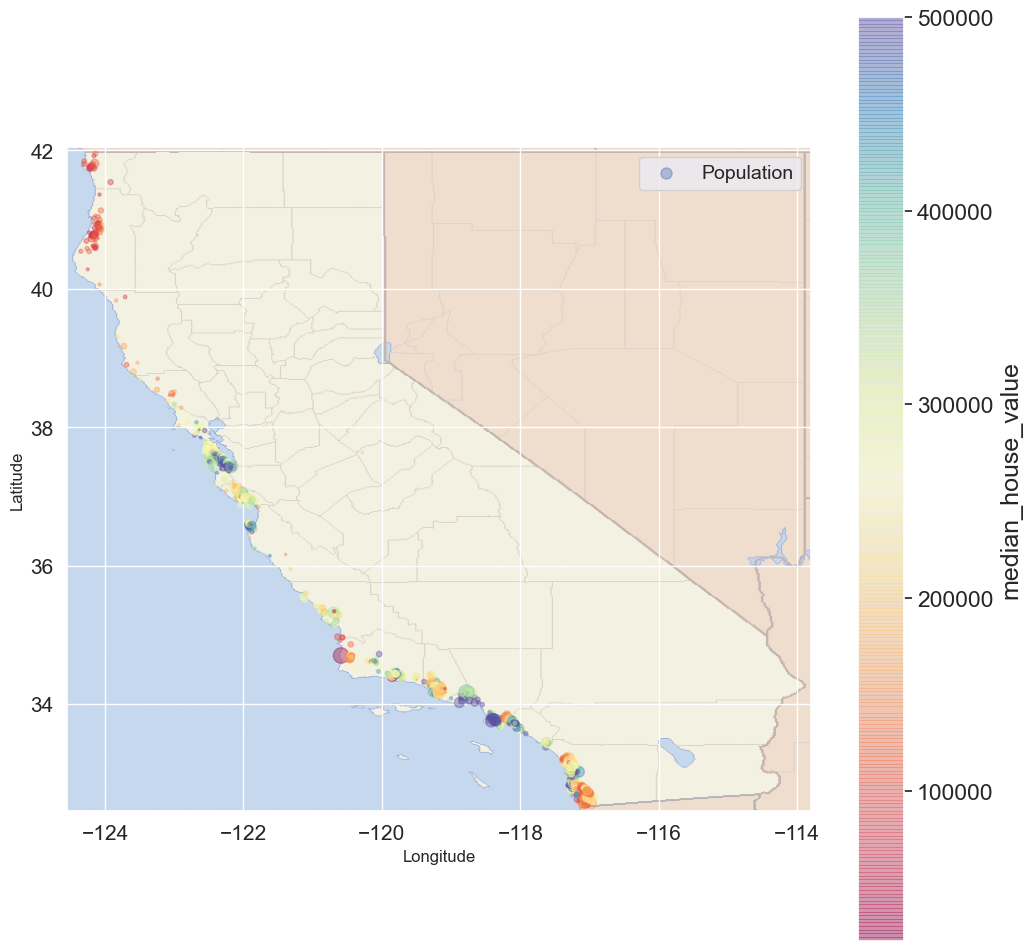

In [34]:
df_loc.plot(kind = "scatter", x = "longitude", y = "latitude",
            s = df_loc['population'] / 100, label = "Population", figsize = (12, 12),
            c = "median_house_value", cmap = "Spectral",
            colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.imshow(cali_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
           cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 12)
plt.xlabel("Longitude", fontsize = 12)
plt.legend(fontsize = 14)
plt.show()

In [35]:
# We want to specify houses near the ocean location to pop up on our map
df_loc = df[df.ocean_proximity == prox[1]].copy()

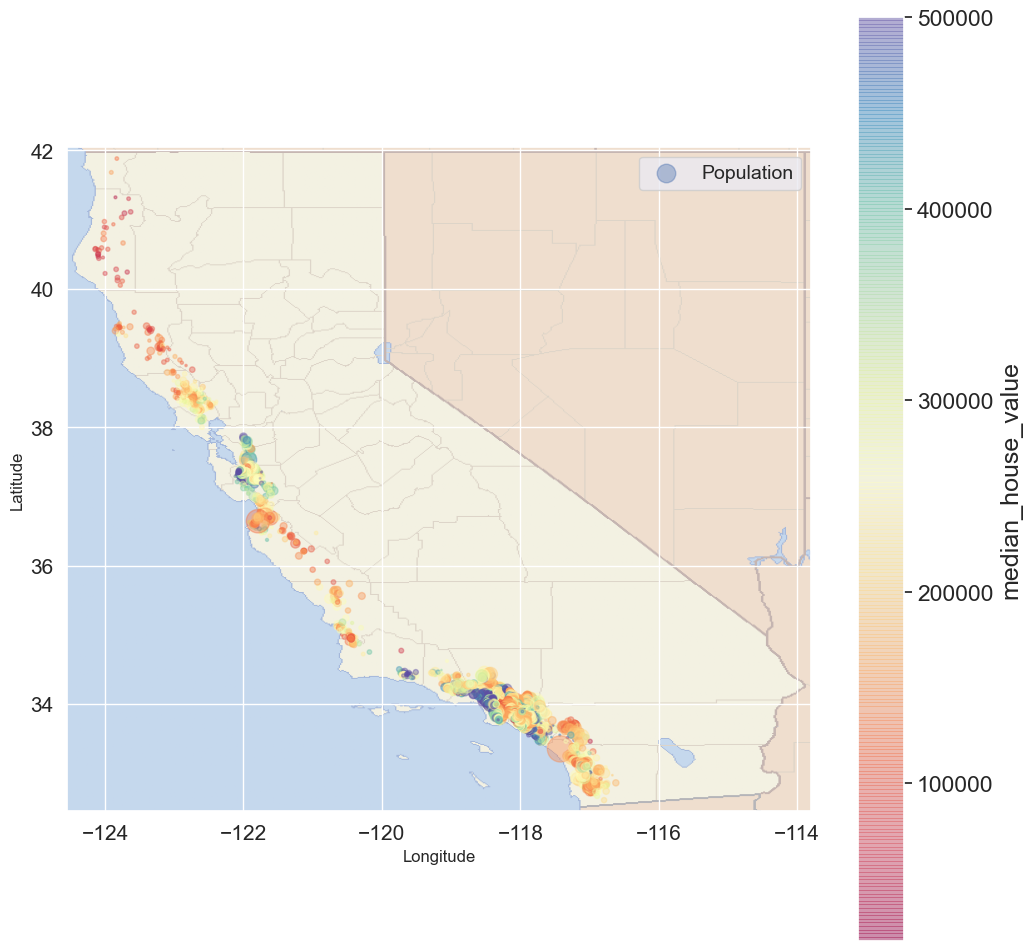

In [36]:
df_loc.plot(kind = "scatter", x = "longitude", y = "latitude",
            s = df_loc['population'] / 100, label = "Population", figsize = (12, 12),
            c = "median_house_value", cmap = "Spectral",
            colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.imshow(cali_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
           cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 12)
plt.xlabel("Longitude", fontsize = 12)
plt.legend(fontsize = 14)
plt.show()

### More Data Analysis using Seaborn

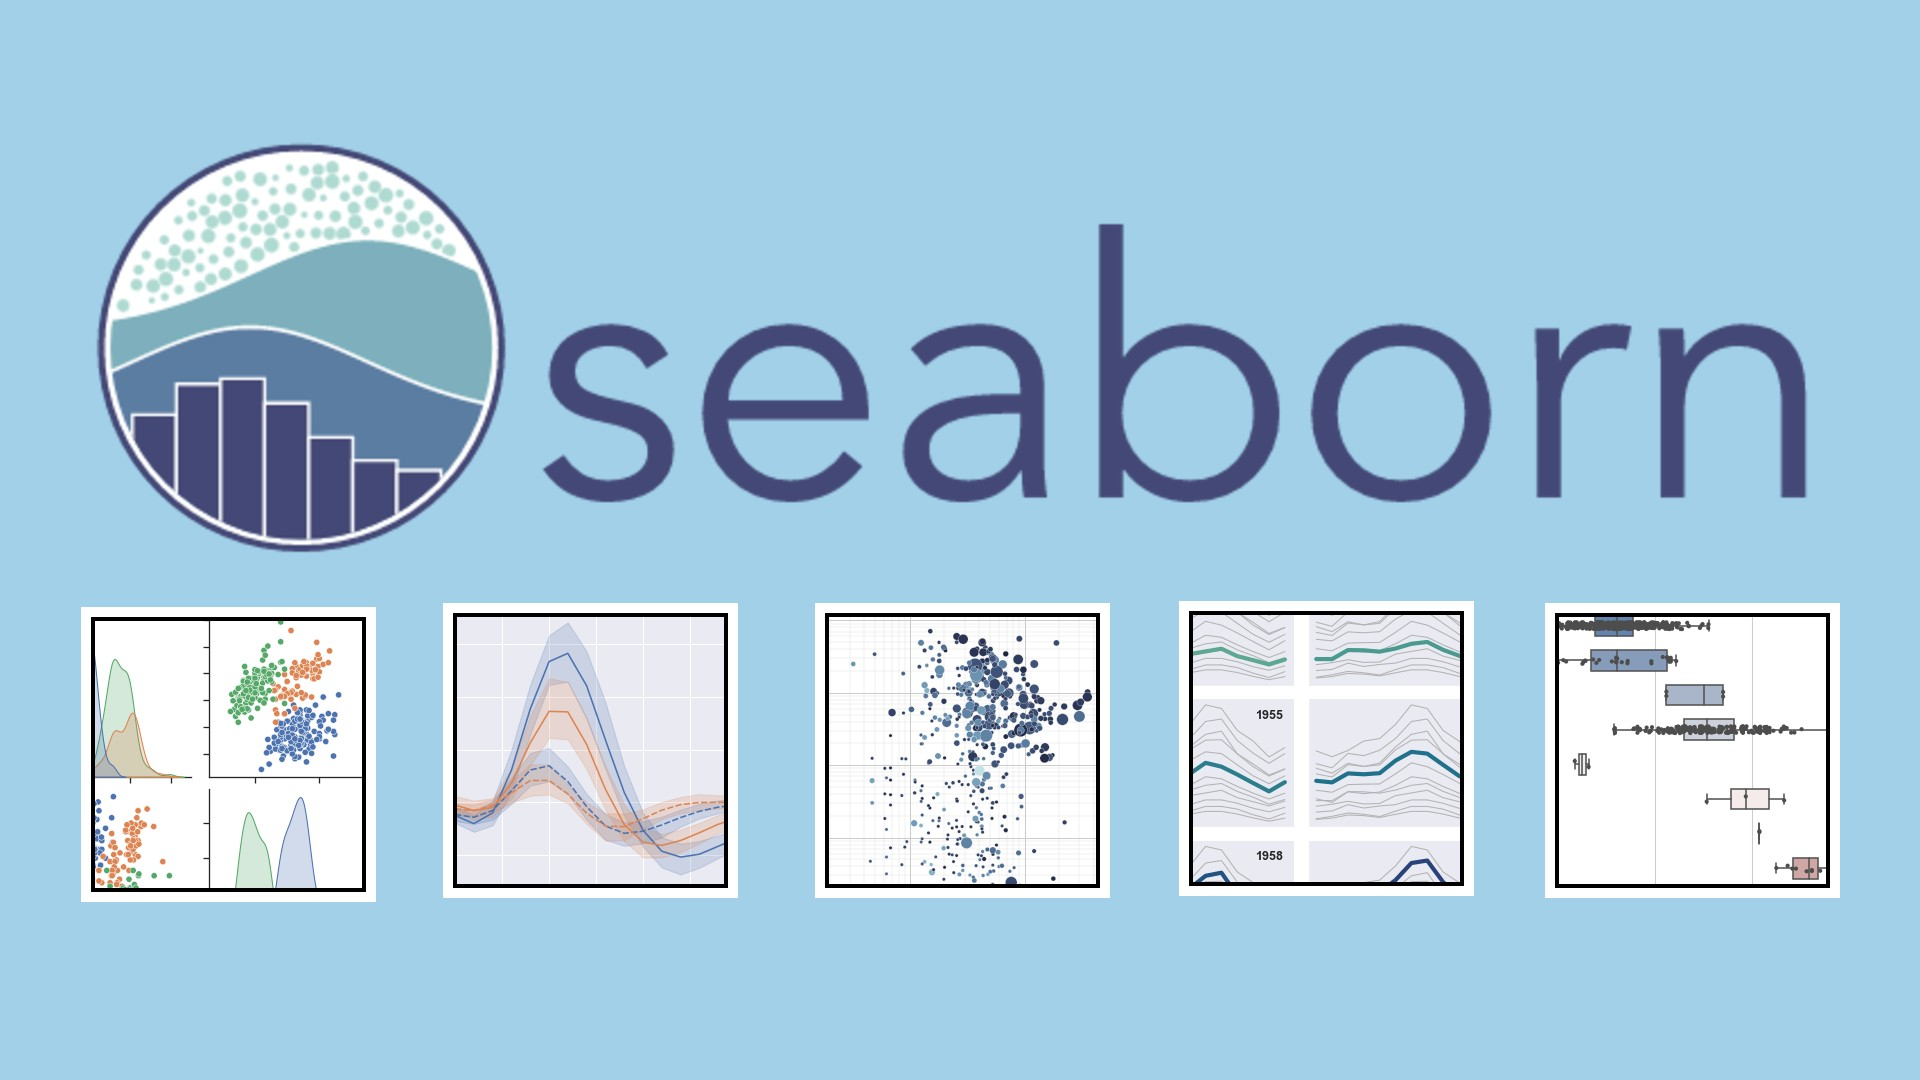

In [37]:
df.head()
# income + house prices?

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


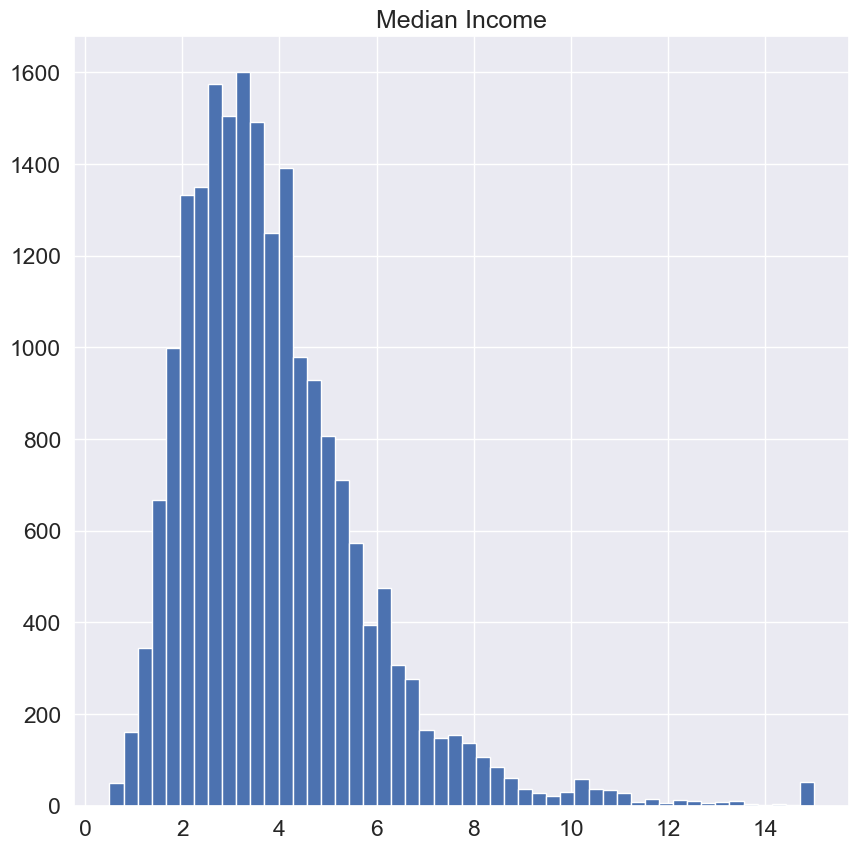

In [38]:
df.median_income.hist(bins = 50, figsize = (10, 10))
plt.title("Median Income")
plt.show()

In [39]:
# qcut = quantile cut
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [40]:
# Bin Discretization
# transforming numerical variables into categorical counterparts
# An example is to bin values for Age into categories such as 20-39, 40-59, and 60-79
# Numerical variables can be discretized too
# Organized into percentiles

df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above Average", "High", "Very High"])

In [41]:
# This is how we get relative counts here and we see the percentage of houses in each category
df.income_cat.value_counts(normalize = True)

Above Average    0.250037
Low              0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

In [44]:
# feature engineered category 
df.income_cat

0            Very High
1            Very High
2                 High
3                 High
4        Above Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above Average' < 'High' < 'Very High']

Let's see this now.

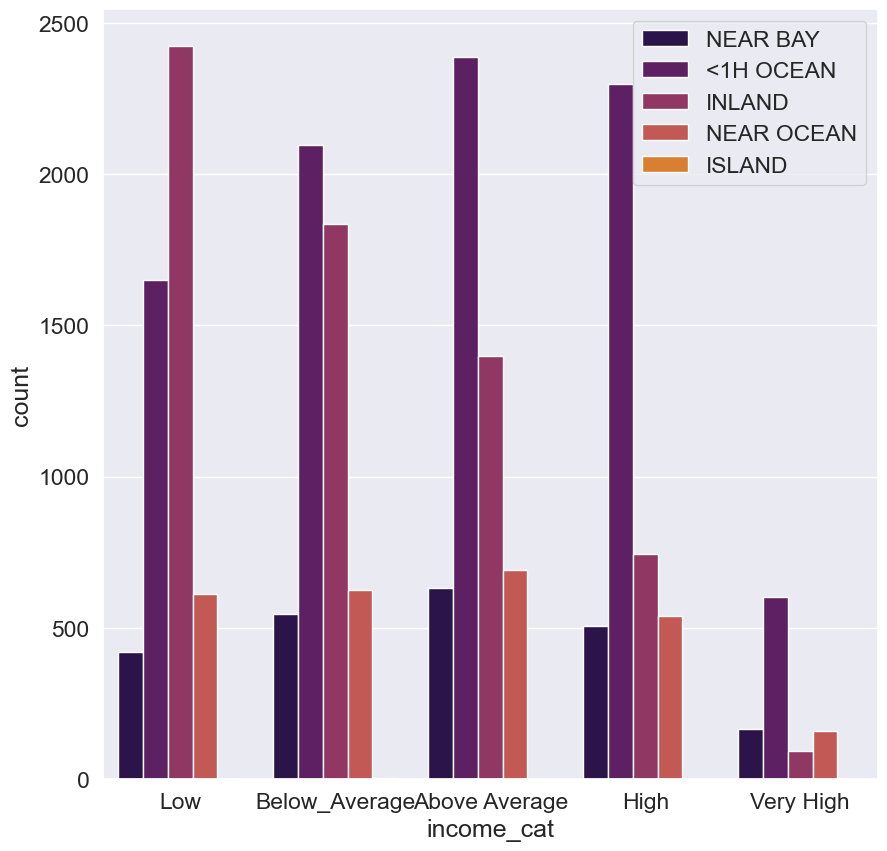

In [43]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.5, palette = "inferno")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

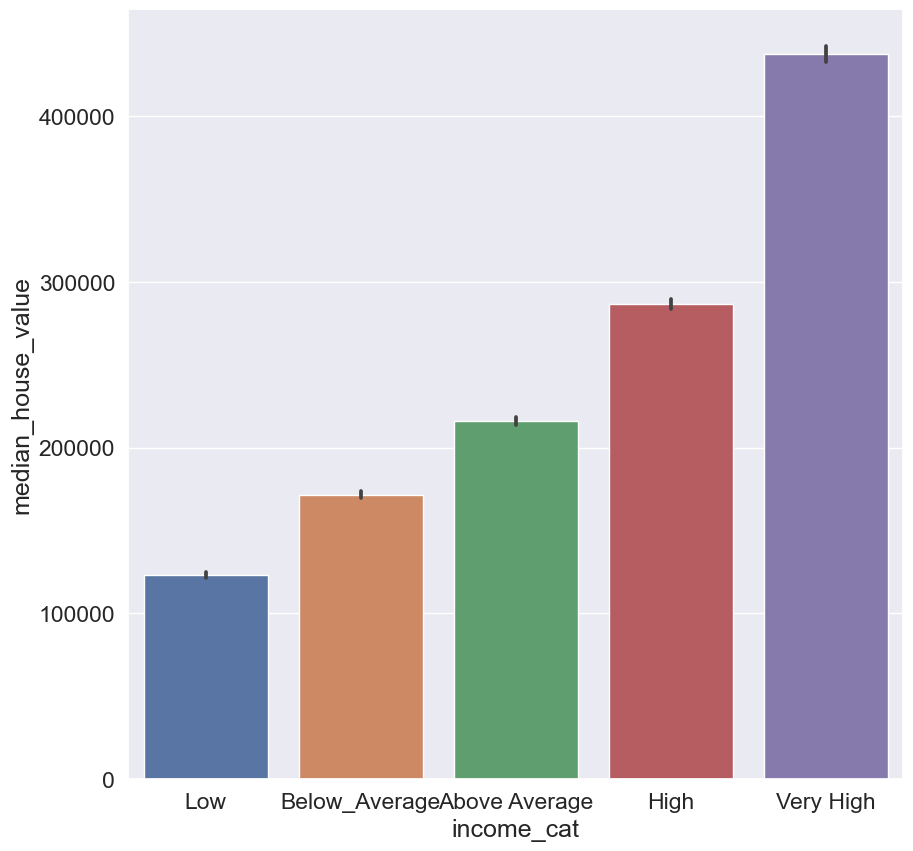

In [45]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

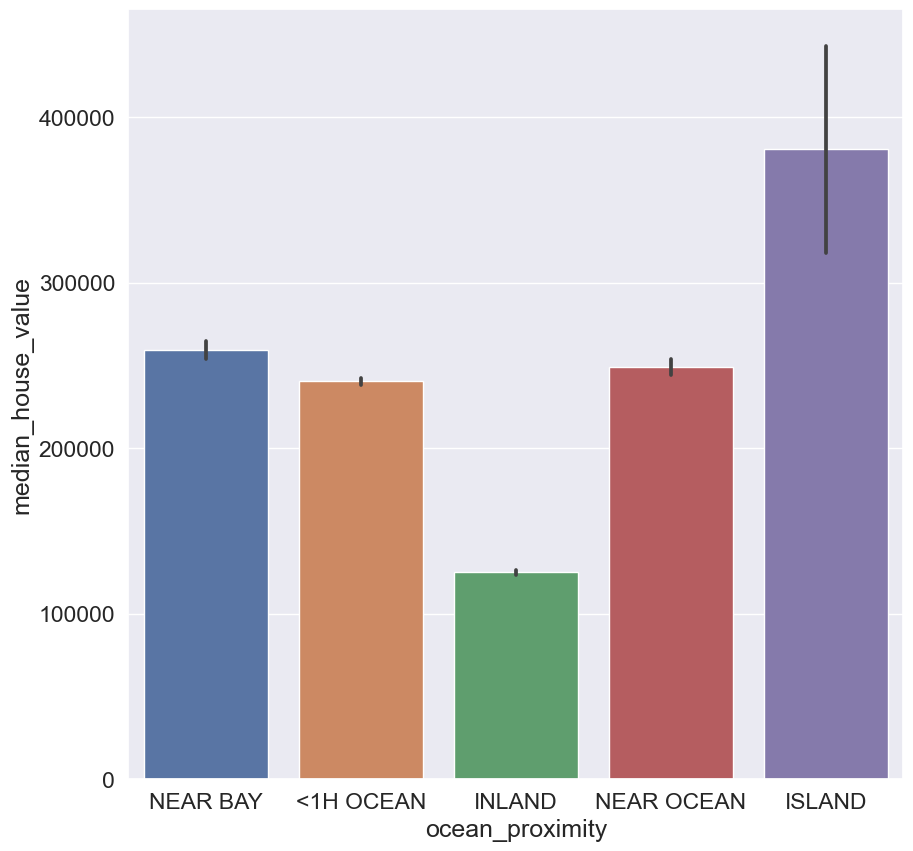

In [47]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

# black lines show 95% confidence intervals

In [49]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [50]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])
# method chaining

In [51]:
matrix.astype(int)

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

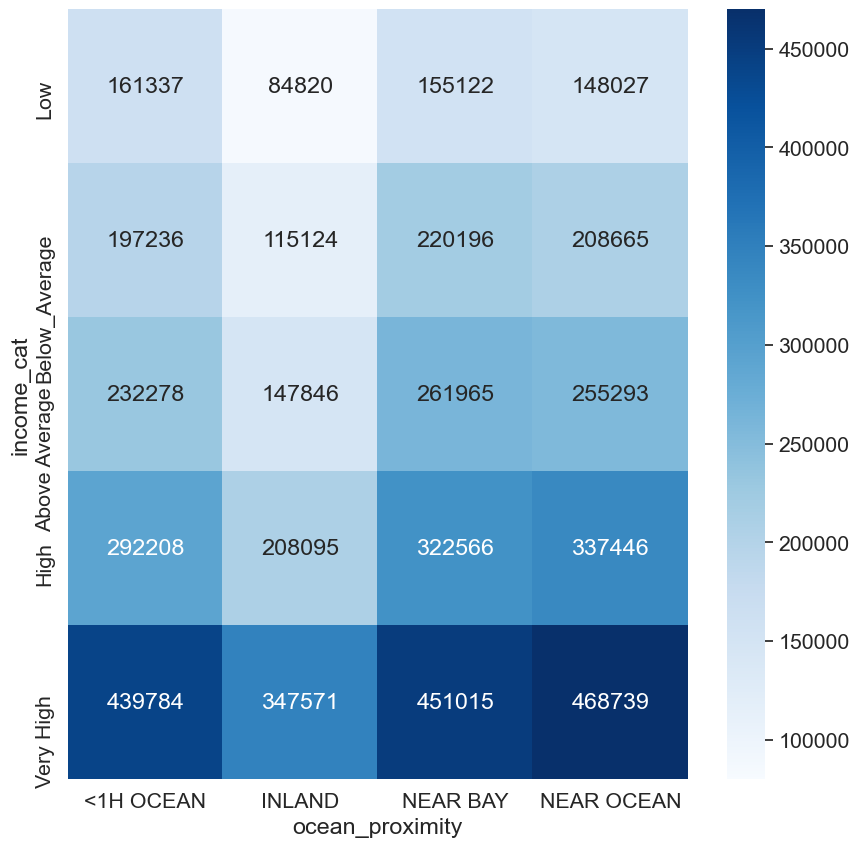

In [55]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.4)
sns.heatmap(matrix.astype("int"), cmap = "Blues", annot = True, fmt = "d", vmin = 80000, vmax = 470000)
plt.show()

### More Feature Engineering

In [56]:
# we're gonna predict this aka we want to forecast this value
final_label = df.median_house_value.copy()
final_label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [58]:
# so we drop it
features = df.drop(columns = ["median_house_value"])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209,Low


In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20433 non-null  float64 
 1   latitude             20433 non-null  float64 
 2   housing_median_age   20433 non-null  float64 
 3   total_rooms          20433 non-null  float64 
 4   total_bedrooms       20433 non-null  float64 
 5   population           20433 non-null  float64 
 6   households           20433 non-null  float64 
 7   median_income        20433 non-null  float64 
 8   ocean_proximity      20433 non-null  object  
 9   rooms_per_household  20433 non-null  float64 
 10  bedrooms_per_room    20433 non-null  float64 
 11  pop_per_household    20433 non-null  float64 
 12  income_cat           20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.7+ MB


In [60]:
# because numerical values have different scales
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209


![pic](https://scipy.org/images/logo.svg)

In [61]:
# scipy library is a statistical for scientific computing
import scipy.stats as stats

In [62]:
# zscore is a number that tells us how much a given value differs from the standard deviation
# In English, this gives you an idea of how far from the mean a data point is.
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,pop_per_household
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-1.146024,-0.049433
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.987254,-0.092134
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-1.440514,-0.025797
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.492925,-0.050162
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.706141,-0.085272
5,-1.337296,1.037674,1.855769,-0.785965,-0.770978,-0.893015,-0.801574,0.087213,-0.269721,0.323119,-0.089254
6,-1.337296,1.032993,1.855769,-0.046450,-0.115979,-0.292051,0.038103,-0.111656,-0.201152,-0.347344,-0.090355
7,-1.337296,1.032993,1.855769,0.213936,0.353912,-0.236456,0.386007,-0.395505,-0.255274,0.142951,-0.122943
8,-1.342287,1.032993,1.061582,-0.037298,0.301702,-0.193214,0.249984,-0.942881,-0.458026,0.814662,-0.100081
9,-1.337296,1.032993,1.855769,0.417577,0.401375,0.111238,0.561267,-0.094754,-0.185573,-0.238487,-0.086153


In [63]:
pd.options.display.float_format = '{:.2f}'.format

In [65]:
feat1.agg(["mean", "std"])
# we have 0 and 1, aka we standardized the features
# so all the features are scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,pop_per_household
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


- By the way, Machine Learning Algorithms generally don't handle text data well.
- Sooooo we transfer text and categorical values into numerical ones they can understand...that's the tweet

In [66]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

![One Hot Encoding](https://chrisalbon.com/images/machine_learning_flashcards/One-Hot_Encoding_print.png)

In [67]:
# One hot encoding: binary values to indicate to computer which value we want
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [68]:
# merge aaaaaall the features into one data frame
features = pd.concat([feat1, dummies, df.income_cat], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,pop_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-1.15,-0.05,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.99,-0.09,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-1.44,-0.03,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.49,-0.05,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.71,-0.09,0,0,0,1,0,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,0.20,-0.05,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.04,0.00,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,0.04,-0.07,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,0.12,-0.09,0,1,0,0,0,Low
